In [1]:
# Importing the libraries
import pandas as pd  # Pandas (version : 1.1.5)
import numpy as np  # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt  # Matplotlib (version : 3.3.2)
from sklearn.cluster import KMeans  # Scikit Learn (version : 0.23.2)
import seaborn as sns  # Seaborn (version : 0.11.1)

# Setting style for plots
plt.style.use('seaborn')

# Importing the data from the .csv file
data = pd.read_csv('/content/iris.csv')

# Viewing the data
print(data.head())
print(data.tail())

# Checking the sample size
print(len(data))

# Checking the dimensions/shape of the dataset
print(data.shape)

# Viewing column names
print(data.columns)

# Iterating over column names
for i, col in enumerate(data.columns):
    print(f'Column number {i+1} is {col}')

# Viewing data types of each column
print(data.dtypes)

# Getting more information about the dataset
data.info()

# Describing the dataset (basic statistics)
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Dropping the 'Id' column as it is not relevant
data.drop('Id', axis=1, inplace=True)

# Viewing the data after dropping the 'Id' column
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

<ipython-input-1-76302320a4cb>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2


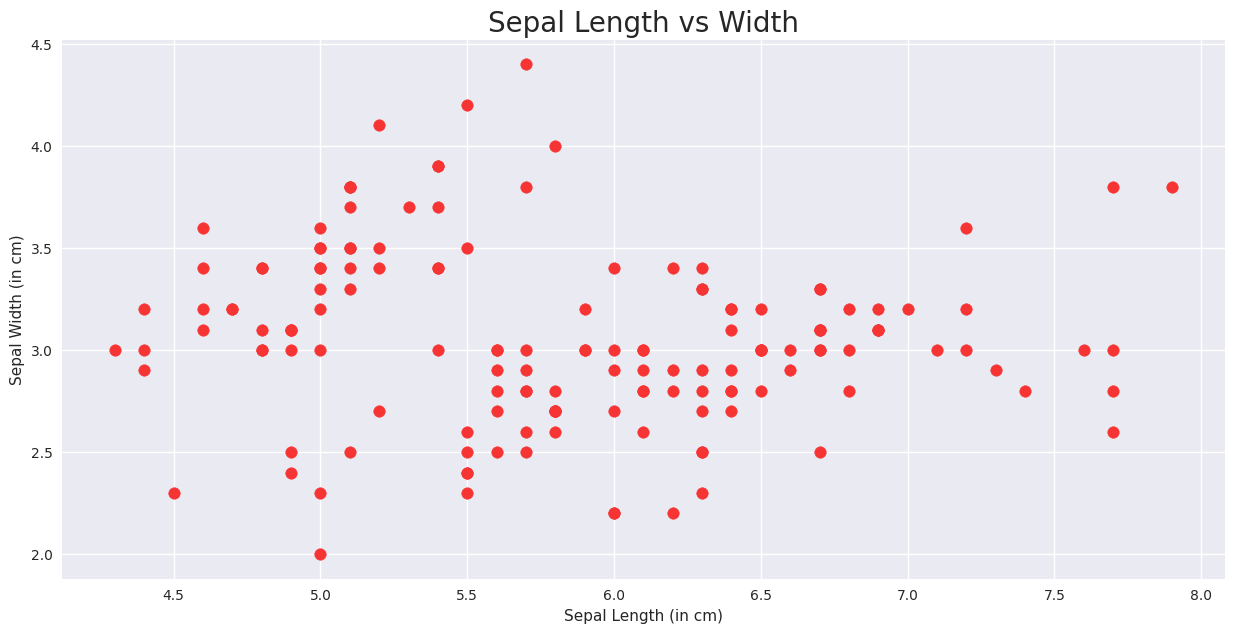

In [2]:
# Checking for missing values
print(data.isna().sum())

# Viewing the data for clustering
print(data.head())

# Checking the value count of the target column ('Species')
print(data['Species'].value_counts())

# Splitting into Target Data and Training Data
target_data = data.iloc[:, 4]
print(target_data.head())

clustering_data = data.iloc[:, [0, 1, 2, 3]]
print(clustering_data.head())

# Visualizing the data for clustering
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(
    x=data['SepalLengthCm'],
    y=data['SepalWidthCm'],
    s=70,
    color='#f73434',
    edgecolor='#f73434',
    linewidth=0.3
)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize=20)
plt.show()


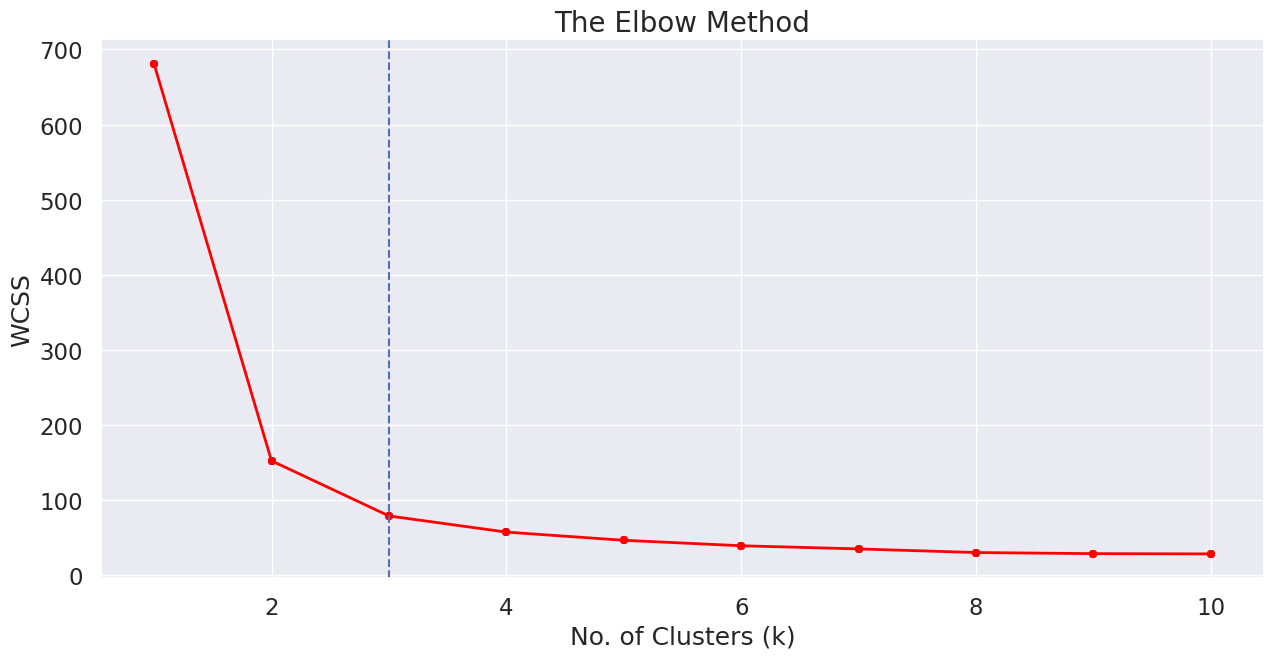

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0            5.1           3.5            1.4           0.2   
1            4.9           3.0            1.4           0.2   
2            4.7           3.2            1.3           0.2   
3            4.6           3.1            1.5           0.2   
4            5.0           3.6            1.4           0.2   

   Cluster_Prediction  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


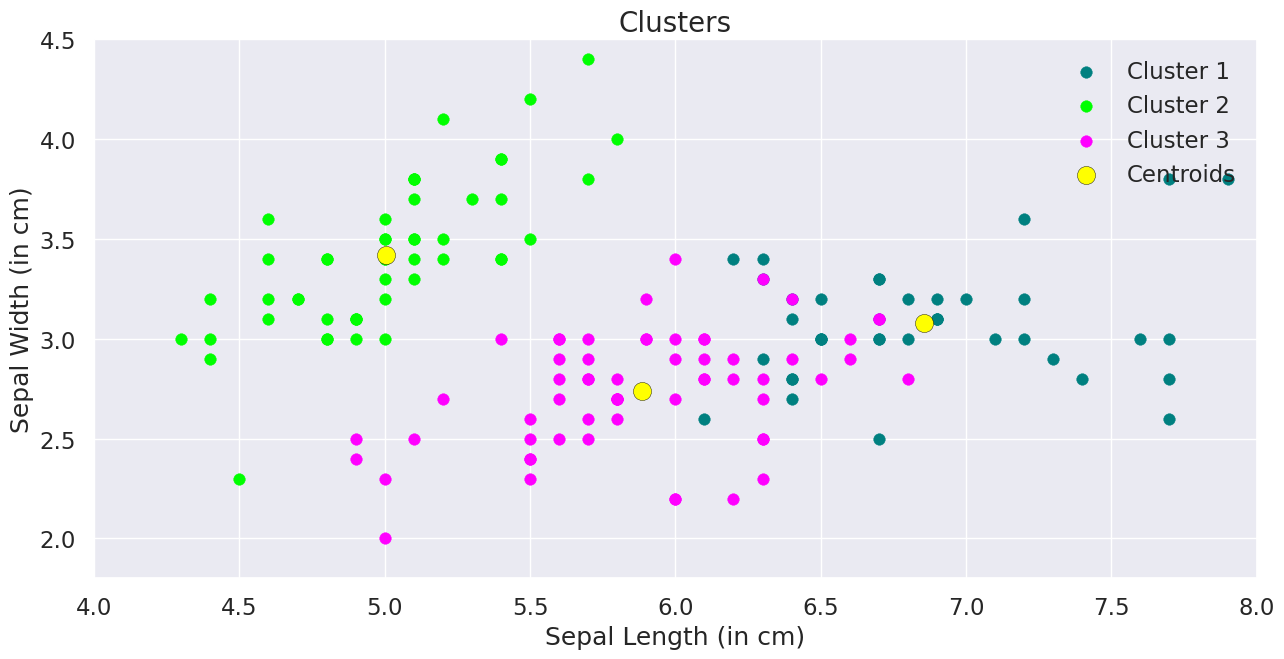

In [3]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determining the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(clustering_data)
    wcss.append(km.inertia_)

# Visualizing the Elbow Method
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.axvline(x=3, ls='--')  # Marking the elbow at k=3
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize=20)
plt.show()

# Clustering the data with k=3 as determined from the Elbow Method
kms = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)

# Viewing the head of the data with cluster predictions
print(clusters.head())

# Getting the centroids of the clusters
centroids = kms.cluster_centers_
print(centroids)

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70, edgecolor='teal', linewidth=0.3, c='teal', label='Cluster 1')
plt.scatter(clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70, edgecolor='lime', linewidth=0.3, c='lime', label='Cluster 2')
plt.scatter(clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70, edgecolor='magenta', linewidth=0.3, c='magenta', label='Cluster 3')

# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=170, c='yellow', label='Centroids', edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize=20)
plt.show()


In [1]:
# K-Mean

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Remove the target column
X = data.drop('Species', axis=1) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 5: Use the elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)  # Try from 1 to 10 clusters

In [7]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

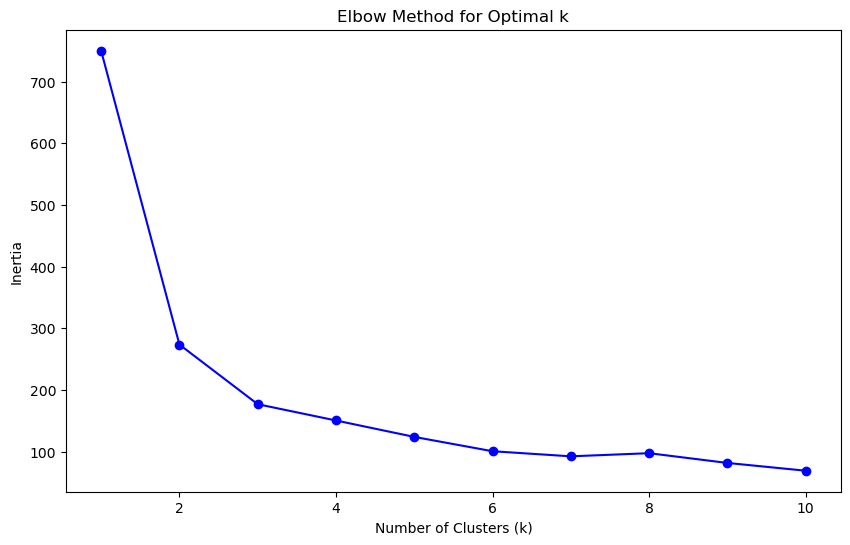

In [8]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# Step 6: Train K-Means with the optimal number of clusters
# Assuming the elbow method suggests 3 clusters for the Iris dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Step 7: Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_
data.head()

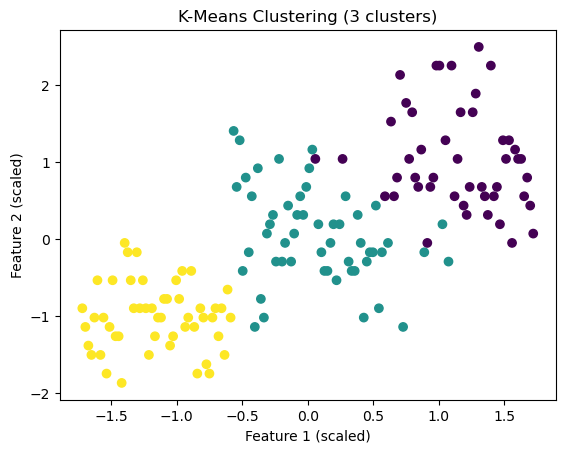

In [10]:
# Optional: Visualize the clusters if using 2D or 3D plots
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering (3 clusters)')
plt.show()